In [16]:
import numpy as np
import matplotlib.pyplot as plt
'''
PROCESSAMENTO DE SINAIS
'''
from scipy.signal import savgol_filter
import scipy.integrate as integrate
import scipy.fftpack
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.stats.distributions import  t
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
from scipy import interpolate
import scipy.stats as ss
'''
DATAFRAMES PANDAS
'''
import pandas as pd
from collections import OrderedDict
'''
ESTATISTICAS ESPECTRAIS
'''
import librosa
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
def salvaDataFrames_csv(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_csv(caminhoSaida+'\/'+nomeArquivo, sep=',', encoding = 'utf-8')
       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'\/'+nomeArquivo, compression='infer')

In [6]:
caminhoDataframe = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/DataFrames\/' 

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

dataFrame_SN = abreDataFrame(caminhoDataframe, 'dataFrame_thermo.pkl')
dataFrame_SN.head(10)

,Nome_Supernova,Tipo,Fase,Tag_Fase,SNx_Redshifted,SNy_Redshifted,Valor_Redshift,Wl_Absorcao,pk_Absorcao,Valesx,Valesy,Wl_Emissao,pk_Emissao,Picosx,Picosy
0,SN_Redshifted_sn1998V-19980319.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",0.0539,"[17.619215433334755, 57.31946665128062, 21.342...","[0.18021023580890244, 0.3243176017774667, 0.15...","[3733.0250604586895, 3793.191421510006, 3996.2...","[0.3130176858469804, 0.3015509334649366, 0.791...","[1.0118360413773377, 163.63754035206378, 300.8...","[0.016817304947432887, 0.8058522452437912, 1.0...","[3755.5874458529333, 3932.326131441176, 4071.4...","[0.3197765890370293, 0.9046622089121021, 0.968..."
1,SN_Redshifted_sn1998V-19980320.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",0.0539,"[16.371018937613947, 64.2944024344855, 20.7707...","[0.1674436182667774, 0.34893402599080686, 0.15...","[3736.7854580243966, 3796.9518190757135, 4003....","[0.31617237791302105, 0.2923087716430614, 0.78...","[0.9141701804806469, 167.19453902302976, 139.1...","[0.015194041396336656, 0.8083987547571595, 1.0...","[3755.5874458529333, 3939.8469265725907, 4071....","[0.3185954230433903, 0.9012502335136664, 0.964..."
2,SN_Redshifted_sn1998V-19980321.flm,Ia,-0.956,Maximo,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",0.0237,"[185.40637775724102, 21.358415820673404, 4.537...","[0.6810259254183335, 0.1590846850586145, 0.045...","[3788.3458679918863, 3997.1918821476347, 4138....","[0.2552889392094797, 0.803456614913874, 0.8579...","[12.312571117750375, 192.06947226829752, 141.7...","[0.09432841640783755, 0.9196702797739789, 1.0,...","[3661.546502254467, 3933.7921992789256, 4068.0...","[0.6753503669909301, 0.9427250499615443, 0.969..."
3,SN_Redshifted_sn1998dx-19980914.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",0.0170,"[212.44875440729388, 35.28210321823908, 86.394...","[0.542094651484383, 0.23714572395466332, 0.276...","[3722.0696358185683, 3997.8535324393565, 4291....","[0.42189037891622544, 0.676250566806941, 0.459...","[227.59655953321945, 232.49044388801792, 7.723...","[0.8252713893812736, 0.7909786778434359, 0.060...","[3921.6500873204545, 4070.428242076406, 4382.4...","[0.8907557494102819, 0.8823846210297399, 0.534..."
4,SN_Redshifted_sn1998dx-19980915.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",0.0170,"[21.710703139845464, 128.25771071955825, 41.25...","[0.21367836230340134, 0.45314122035985077, 0.2...","[3591.4351584718793, 3722.0696358185683, 3994....","[0.5887253091565299, 0.36673600558762776, 0.56...","[34.865542237806274, 157.97028029754966, 166.6...","[0.26689387783346896, 0.5804419788934498, 0.54...","[3631.3512487722564, 3914.3926163567494, 4081....","[0.630566051482265, 0.7546175525445505, 0.7453..."
5,SN_Redshifted_sn1998dx-19980917.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.495615778559792, 0.6598588802703995, 0.7312...",0.0170,"[16.68940289378036, 13.076396011426443, 40.833...","[0.25551298910912457, 0.09008920653504715, 0.2...","[3569.6627455807643, 3729.3271067822734, 3798....","[0.5115434775288177, 0.3926142462191819, 0.355...","[39.916090300377164, 82.44579809249994, 3.5466...","[1.0, 0.5163694482104669, 0.051440996742034326...","[3540.6328617259446, 3605.950100399289, 3751.0...","[0.742741647615746, 0.6179282090302084, 0.3993..."
6,SN_Redshifted_sn1998dx-19980918.flm,Ia,-1.890,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.5954063726305847, 0.6035925242893051, 0.619...",0.0539,"[7.496982253547999, 24.168174334791697, 16.477...","[0.09390927564713371, 0.17526893071660174, 0.1...","[3587.806422990027, 3736.584577745978, 3787.38...","[0.6305865631399746, 0.40897559572

In [10]:
def transforma_Listas(data):
    vetorLista = []
    for i in range(len(data)):
        test = []
        test = data[i]
        
        lista = []
        for j in range(50):
            #lista.append(test[j])
            lista.append(0)
        
        for j in range(len(test)):
            lista[j] = test[j]
        
        vetor = np.array(lista)    
        vetorLista.append(vetor)
        
    return vetorLista

In [11]:
def gerandoPCA_DataFrame(dataFrame):
    data1 = dataFrame_SN.loc[:,'SNy_Redshifted']
    data1 = data1.tolist()
    
    data2 = dataFrame_SN.loc[:,'Wl_Absorcao']
    data2 = data2.tolist()
    
    
    data3 = dataFrame_SN.loc[:,'pk_Absorcao']
    data3 = data3.tolist()
    
    data4 = dataFrame_SN.loc[:,'Valesx']
    data4 = data4.tolist()
    
    data5 = dataFrame_SN.loc[:,'Valesy']
    data5 = data5.tolist()
    
    
    '''
    Caracteristicas mantidas no dataframe original
    '''
    data6 = dataFrame_SN.loc[:,'SNx_Redshifted']
    data6 = data6.tolist()
     
    data7 = dataFrame_SN.loc[:,'Nome_Supernova']
    data7 = data7.tolist()
    
    data8 = dataFrame_SN.loc[:,'Tipo']
    data8 = data8.tolist()
    
    data9 = dataFrame_SN.loc[:,'Fase']
    data9 = data9.tolist()
    
    data10 = dataFrame_SN.loc[:,'Tag_Fase']
    data10 = data10.tolist()
    
    
    dataFrameFeatures = OrderedDict(
    {
     'Nome_SN':data6,
     'SNx':data7,
     'SNy':data1,
     'Fase':data8,
     'Tipo':data9,
     'Tag_Fase':data10
     })
    df = pd.DataFrame(dataFrameFeatures)
    
    
    '''
    requerimento para gerar o PCA
    X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
            
    Transformar SNy == (3082,1000)
    Transformar SNx == (3082,1000)        
    '''
    
    SNy = np.asarray(data1)
    Wl =  np.asarray(transforma_Listas(data2))
    pk =  np.asarray(transforma_Listas(data3))
    Vx =  np.asarray(transforma_Listas(data4))
    Vy =  np.asarray(transforma_Listas(data5))
   
    print(SNy.shape)
    print(Wl.shape)
    print(pk.shape)
    print(Vx.shape)
    print(Vy.shape)
    
    #gerando os PCAs
    pca = PCA(n_components=2)
    
    PCA_SNy = pca.fit_transform(SNy)
    PCA_Wl = pca.fit_transform(Wl)
    PCA_pk = pca.fit_transform(pk)
    PCA_Vx = pca.fit_transform(Vx)
    PCA_Vy = pca.fit_transform(Vy)
    
    principalDf_SNy = pd.DataFrame(data = PCA_SNy
             , columns = ['PCA_SNy_1', 'PCA_SNy_2'])

    principalDf_Wl = pd.DataFrame(data = PCA_Wl
             , columns = ['PCA_Wl_1', 'PCA_Wl_2'])

    principalDf_pk = pd.DataFrame(data = PCA_pk
             , columns = ['PCA_pk_1', 'PCA_pk_2'])

    principalDf_Vx = pd.DataFrame(data = PCA_Vx
             , columns = ['PCA_Vx_1', 'PCA_Vx_2'])

    principalDf_Vy = pd.DataFrame(data = PCA_Vy
             , columns = ['PCA_Vy_1', 'PCA_Vy_2'])

    
    dataFrame_Final = pd.concat([df,principalDf_SNy,principalDf_Wl,principalDf_pk,principalDf_Vx,principalDf_Vy],axis = 1)
    
    return dataFrame_Final

In [12]:
dataFrame_PCA = gerandoPCA_DataFrame(dataFrame_SN)

salvaDataFrames_csv(dataFrame_PCA,caminhoDataframe,'Data_Frame_Ia_PCA.csv')
salvaDataFrames_pkl(dataFrame_PCA,caminhoDataframe,'Data_Frame_Ia_PCA.pkl')

(3082, 1000)
(3082, 50)
(3082, 50)
(3082, 50)
(3082, 50)


In [13]:
dataFrame_PCA.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_SNy_1,PCA_SNy_2,PCA_Wl_1,PCA_Wl_2,PCA_pk_1,PCA_pk_2,PCA_Vx_1,PCA_Vx_2,PCA_Vy_1,PCA_Vy_2
0,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980319.flm,"[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,-1.890,Maximo,-3.989887,-1.327662,-17.852121,-58.765944,-0.295119,0.105517,-6280.719189,-396.874182,-0.241119,0.373996
1,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980320.flm,"[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,-1.890,Maximo,-4.102365,-1.263241,-135.386708,-76.270386,-0.411062,0.193522,1117.916273,4786.035450,-0.069201,0.484576
2,"[3657.8171091445433, 3661.546502254467, 3665.2...",SN_Redshifted_sn1998V-19980321.flm,"[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,-0.956,Maximo,-3.939491,-1.560221,14.502709,1954.728254,-0.044463,-0.272706,-4128.202144,2893.456010,-0.306284,0.584218
3,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980914.flm,"[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,-0.435,Maximo,-4.463030,-1.872636,-58.875086,-63.035828,-0.456231,-0.202430,3706.066803,4403.288462,-0.213103,0.403622
4,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980915.flm,"[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,-0.435,Maximo,-3.999763,-0.583957,-57.264858,-49.922690,-0.444917,0.115991,6098.139925,2879.216191,-0.138856,0.308748


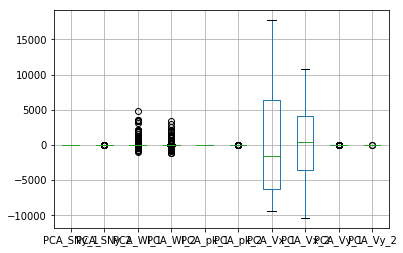

In [14]:
novo_Selecao = dataFrame_PCA[['Tipo','Tag_Fase','PCA_SNy_1','PCA_SNy_2','PCA_Wl_1','PCA_Wl_2','PCA_pk_1','PCA_pk_2','PCA_Vx_1','PCA_Vx_2','PCA_Vy_1','PCA_Vy_2']]
novo_Selecao = novo_Selecao.set_index(['Tipo'])#Tag_Fase agora é um indice

novo_Selecao.boxplot()

Current size: [6.0, 4.0]


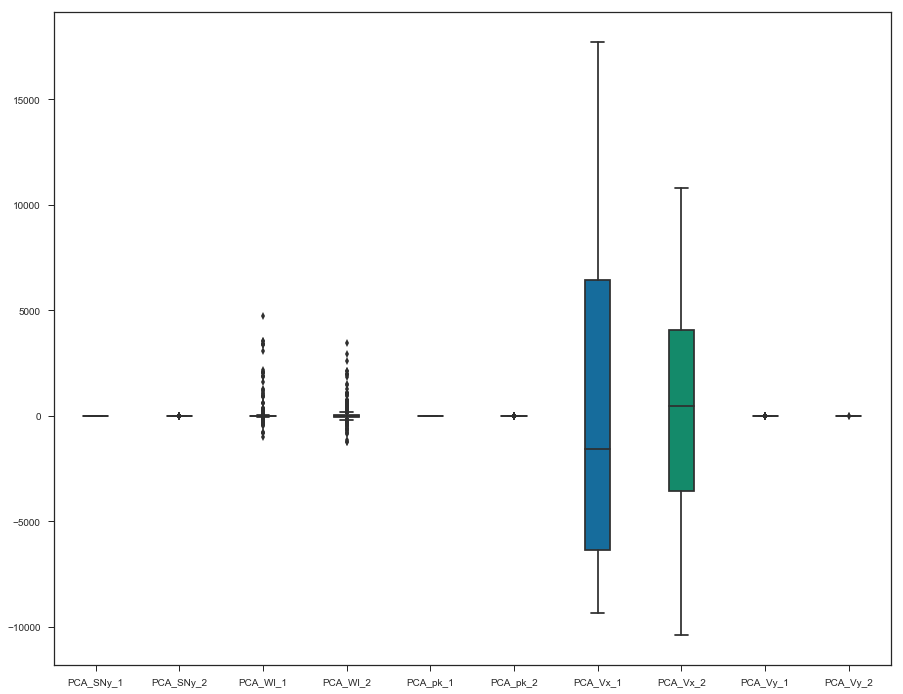

In [20]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

bplot=sns.boxplot(data=novo_Selecao, 
                 width=0.3,
                 palette="colorblind")

C:\Users\Ricardinho\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3063: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


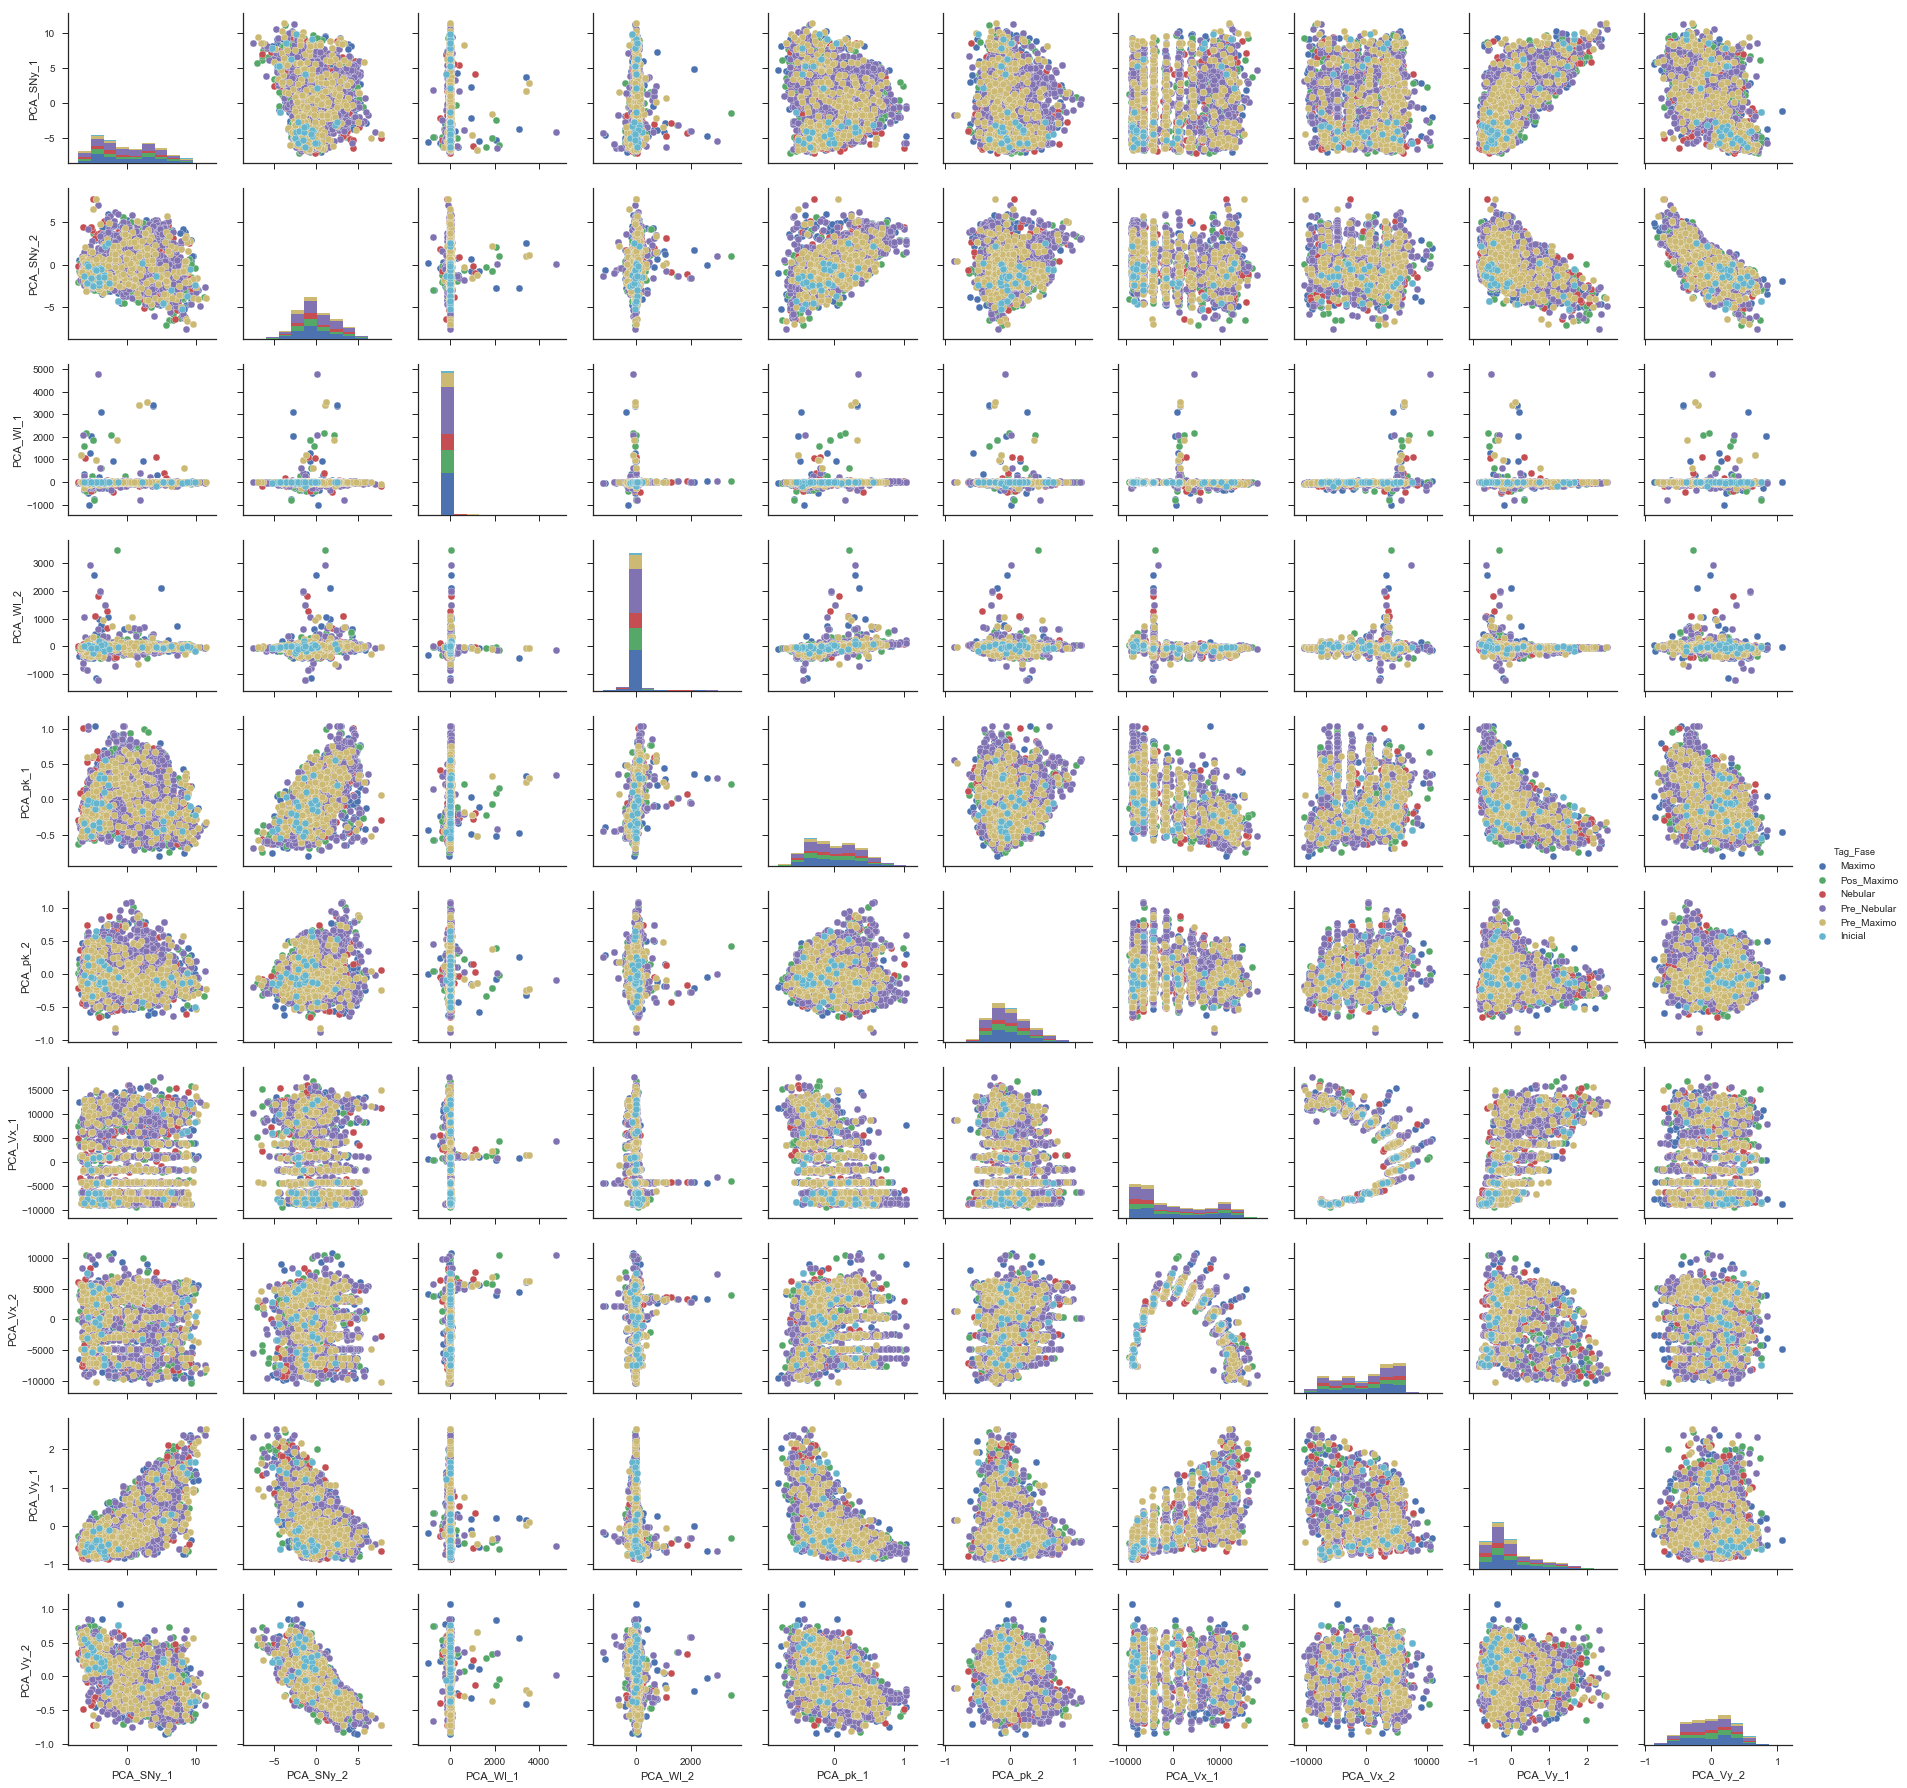

In [15]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(novo_Selecao, hue="Tag_Fase")

In [21]:
def gerandoPCA_DataFrame_II(dataFrame):
    data1 = dataFrame_SN.loc[:,'SNy_Redshifted']
    data1 = data1.tolist()
    
    data2 = dataFrame_SN.loc[:,'Picosx']
    data2 = data2.tolist()
    
    
    data3 = dataFrame_SN.loc[:,'Picosy']
    data3 = data3.tolist()
    
    data4 = dataFrame_SN.loc[:,'Valesx']
    data4 = data4.tolist()
    
    data5 = dataFrame_SN.loc[:,'Valesy']
    data5 = data5.tolist()
    
    
    '''
    Caracteristicas mantidas no dataframe original
    '''
    data6 = dataFrame_SN.loc[:,'SNx_Redshifted']
    data6 = data6.tolist()
     
    data7 = dataFrame_SN.loc[:,'Nome_Supernova']
    data7 = data7.tolist()
    
    data8 = dataFrame_SN.loc[:,'Tipo']
    data8 = data8.tolist()
    
    data9 = dataFrame_SN.loc[:,'Fase']
    data9 = data9.tolist()
    
    data10 = dataFrame_SN.loc[:,'Tag_Fase']
    data10 = data10.tolist()
    
    
    dataFrameFeatures = OrderedDict(
    {
     'Nome_SN':data6,
     'SNx':data7,
     'SNy':data1,
     'Fase':data8,
     'Tipo':data9,
     'Tag_Fase':data10
     })
    df = pd.DataFrame(dataFrameFeatures)
    
    
    '''
    requerimento para gerar o PCA
    X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
            
    Transformar SNy == (3082,1000)
    Transformar SNx == (3082,1000)        
    '''
    
    Px =  np.asarray(transforma_Listas(data2))
    Py =  np.asarray(transforma_Listas(data3))
    Vx =  np.asarray(transforma_Listas(data4))
    Vy =  np.asarray(transforma_Listas(data5))
   
    print(Px.shape)
    print(Py.shape)
    print(Vx.shape)
    print(Vy.shape)
    
    #gerando os PCAs
    pca = PCA(n_components=2)
    
  
    PCA_Px = pca.fit_transform(Px)
    PCA_Py = pca.fit_transform(Py)
    PCA_Vx = pca.fit_transform(Vx)
    PCA_Vy = pca.fit_transform(Vy)


    principalDf_Px = pd.DataFrame(data = PCA_Px
             , columns = ['PCA_Px_1', 'PCA_Px_2'])

    principalDf_Py = pd.DataFrame(data = PCA_Py
             , columns = ['PCA_Py_1', 'PCA_Py_2'])

    principalDf_Vx = pd.DataFrame(data = PCA_Vx
             , columns = ['PCA_Vx_1', 'PCA_Vx_2'])

    principalDf_Vy = pd.DataFrame(data = PCA_Vy
             , columns = ['PCA_Vy_1', 'PCA_Vy_2'])

    
    dataFrame_Final = pd.concat([df,principalDf_Px,principalDf_Py,principalDf_Vx,principalDf_Vy],axis = 1)
    
    return dataFrame_Final

In [22]:
dataFrame_PCA_II = gerandoPCA_DataFrame_II(dataFrame_SN)

salvaDataFrames_csv(dataFrame_PCA_II,caminhoDataframe,'Data_Frame_Ia_PCA_II.csv')
salvaDataFrames_pkl(dataFrame_PCA_II,caminhoDataframe,'Data_Frame_Ia_PCA_II.pkl')

(3082, 50)
(3082, 50)
(3082, 50)
(3082, 50)


In [24]:
dataFrame_PCA_II.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_Px_1,PCA_Px_2,PCA_Py_1,PCA_Py_2,PCA_Vx_1,PCA_Vx_2,PCA_Vy_1,PCA_Vy_2
0,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980319.flm,"[0.5984432965698894, 0.5905492293635906, 0.579...",Ia,-1.890,Maximo,-6458.880203,-655.708442,-0.444330,0.048064,-6280.719189,-396.874182,-0.241119,0.373996
1,"[3657.8171091445433, 3661.5775067102504, 3665....",SN_Redshifted_sn1998V-19980320.flm,"[0.637192333491651, 0.6141274942884631, 0.5960...",Ia,-1.890,Maximo,-2137.843934,3937.730133,-0.275439,0.112216,1117.916273,4786.035451,-0.069201,0.484576
2,"[3657.8171091445433, 3661.546502254467, 3665.2...",SN_Redshifted_sn1998V-19980321.flm,"[0.6570335303026084, 0.6753503669909301, 0.673...",Ia,-0.956,Maximo,-4579.883496,2143.853840,-0.423004,0.239782,-4128.202144,2893.456010,-0.306284,0.584218
3,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980914.flm,"[0.9510331445835957, 0.8747050414260726, 0.822...",Ia,-0.435,Maximo,3484.079226,4660.968715,-0.412396,0.413321,3706.066803,4403.288461,-0.213103,0.403622
4,"[3529.746655280387, 3533.3753907622395, 3537.0...",SN_Redshifted_sn1998dx-19980915.flm,"[0.9336562914191868, 0.8202276475798798, 0.749...",Ia,-0.435,Maximo,3294.567153,4491.130143,-0.331301,0.292613,6098.139925,2879.216191,-0.138856,0.308748


In [28]:
novo_Selecao_II = dataFrame_PCA_II[['Tipo','Tag_Fase','PCA_Py_1','PCA_Py_2','PCA_Vy_1','PCA_Vy_2']]
novo_Selecao_II = novo_Selecao_II.set_index(['Tipo'])#Tag_Fase agora é um indice

Current size: [15.0, 12.0]


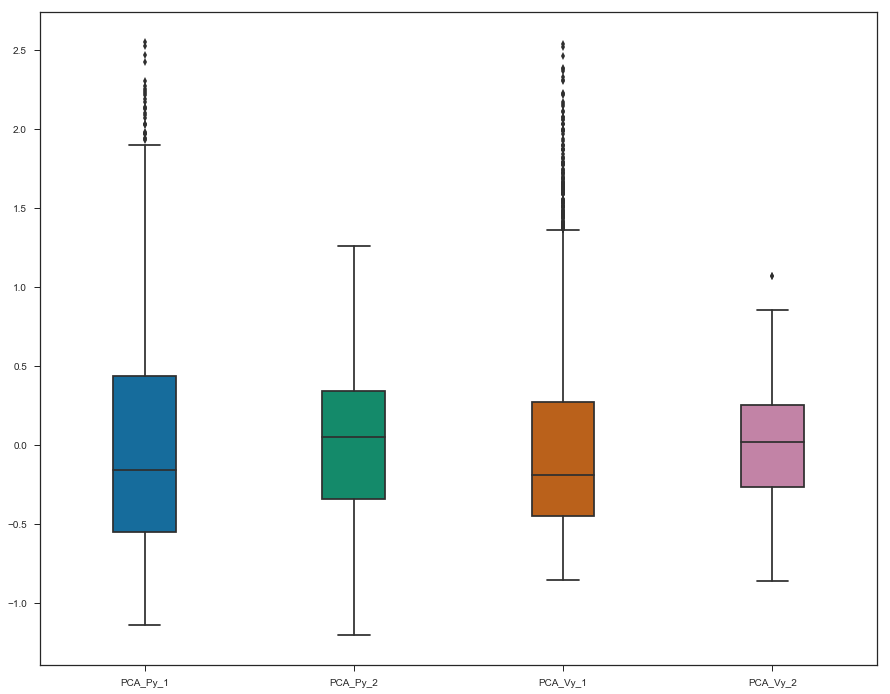

In [29]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

bplot=sns.boxplot(data=novo_Selecao_II, 
                 width=0.3,
                 palette="colorblind")

C:\Users\Ricardinho\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3063: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


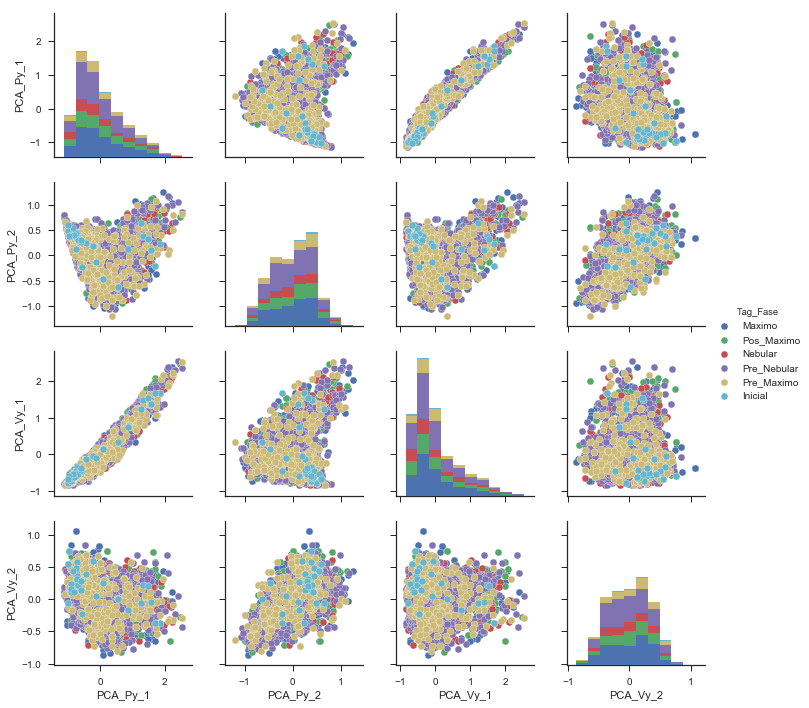

In [30]:
sns.set(style="ticks")
sns.pairplot(novo_Selecao_II, hue="Tag_Fase")

In [31]:
def gerandoPCA_XY(dataFrame):
    
    '''
    dados basicos que sempre ficam no dataframe
    '''
    data1 = dataFrame_SN.loc[:,'SNx_Redshifted']
    data1 = data1.tolist()
    
    data2 = dataFrame_SN.loc[:,'SNy_Redshifted']
    data2 = data2.tolist()
    
    data3 = dataFrame_SN.loc[:,'Nome_Supernova']
    data3 = data3.tolist()
    
    data4 = dataFrame_SN.loc[:,'Tipo']
    data4 = data4.tolist()
    
    data5 = dataFrame_SN.loc[:,'Fase']
    data5 = data5.tolist()
    
    data6 = dataFrame_SN.loc[:,'Tag_Fase']
    data6 = data6.tolist()
    
    #gera o 1st data frame
    dataFrameFeatures = OrderedDict(
    {
     'Nome_SN':data3,
     'SNx':data1,
     'SNy':data2,
     'Fase':data5,
     'Tipo':data4,
     'Tag_Fase':data6
     })
    df = pd.DataFrame(dataFrameFeatures)
    
    '''
    requerimento para gerar o PCA
    X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
            
    Transformar SNy == (3082,1000)
    Transformar SNx == (3082,1000)        
    '''
    
    SNx = np.asarray(data1)
    SNy = np.asarray(data2)
    print(SNx.shape)
    
    #gerando os PCAs
    pca = PCA(n_components=4)
    
    PCA_SNx = pca.fit_transform(SNx)
    
    PCA_SNy = pca.fit_transform(SNy)
    
    principalDf = pd.DataFrame(data = PCA_SNx
             , columns = ['PCA_SNx_1', 'PCA_SNx_2','PCA_SNx_3', 'PCA_SNx_4'])
    
    principalDf_y = pd.DataFrame(data = PCA_SNy
             , columns = ['PCA_SNy_1', 'PCA_SNy_2','PCA_SNy_3', 'PCA_SNy_4'])
    
    dataFrame_Final = pd.concat([df,principalDf,principalDf_y],axis = 1)
    
    return dataFrame_Final

In [32]:
dataFrame_PCA_XY = gerandoPCA_XY(dataFrame_SN)

salvaDataFrames_csv(dataFrame_PCA_XY,caminhoDataframe,'Data_Frame_Ia_PCA_XY.csv')
salvaDataFrames_pkl(dataFrame_PCA_XY,caminhoDataframe,'Data_Frame_Ia_PCA_XY.pkl')

(3082, 1000)


In [33]:
dataFrame_PCA_XY.head(5)

,Nome_SN,SNx,SNy,Fase,Tipo,Tag_Fase,PCA_SNx_1,PCA_SNx_2,PCA_SNx_3,PCA_SNx_4,PCA_SNy_1,PCA_SNy_2,PCA_SNy_3,PCA_SNy_4
0,SN_Redshifted_sn1998V-19980319.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.407957e-10,8.094121e-13,-3.989887,-1.327662,-1.906058,1.198017
1,SN_Redshifted_sn1998V-19980320.flm,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",-1.890,Ia,Maximo,1067.728793,1559.146097,7.468985e-10,-7.022874e-13,-4.102365,-1.263241,-1.900481,1.228636
2,SN_Redshifted_sn1998V-19980321.flm,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",-0.956,Ia,Maximo,503.000753,1591.195877,7.455253e-10,-6.996419e-13,-3.939491,-1.560221,-2.191264,0.987668
3,SN_Redshifted_sn1998dx-19980914.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.447813e-10,-2.083404e-13,-4.463030,-1.872636,1.136015,0.552185
4,SN_Redshifted_sn1998dx-19980915.flm,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",-0.435,Ia,Maximo,-4946.086051,-129.305816,7.447813e-10,-2.083404e-13,-3.999763,-0.583957,1.597298,0.534887


In [34]:
novo_Selecao_XY = dataFrame_PCA_XY[['Tipo','Tag_Fase','PCA_SNx_1', 'PCA_SNx_2','PCA_SNx_3', 'PCA_SNx_4','PCA_SNy_1', 'PCA_SNy_2','PCA_SNy_3', 'PCA_SNy_4']]
novo_Selecao_XY = novo_Selecao_XY.set_index(['Tipo'])#Tag_Fase agora é um indice

Current size: [15.0, 12.0]


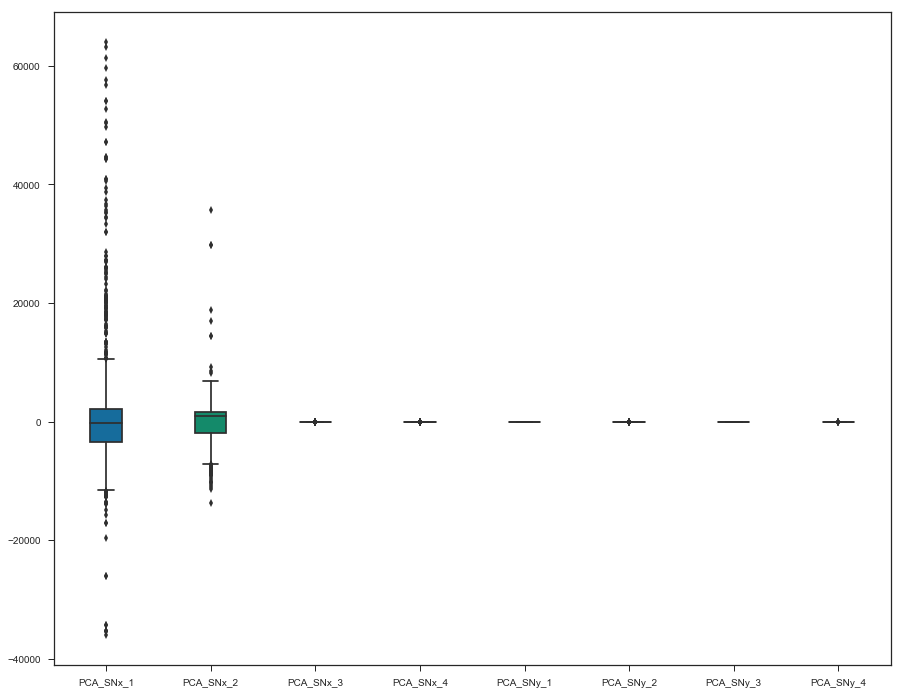

In [35]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

bplot=sns.boxplot(data=novo_Selecao_XY, 
                 width=0.3,
                 palette="colorblind")

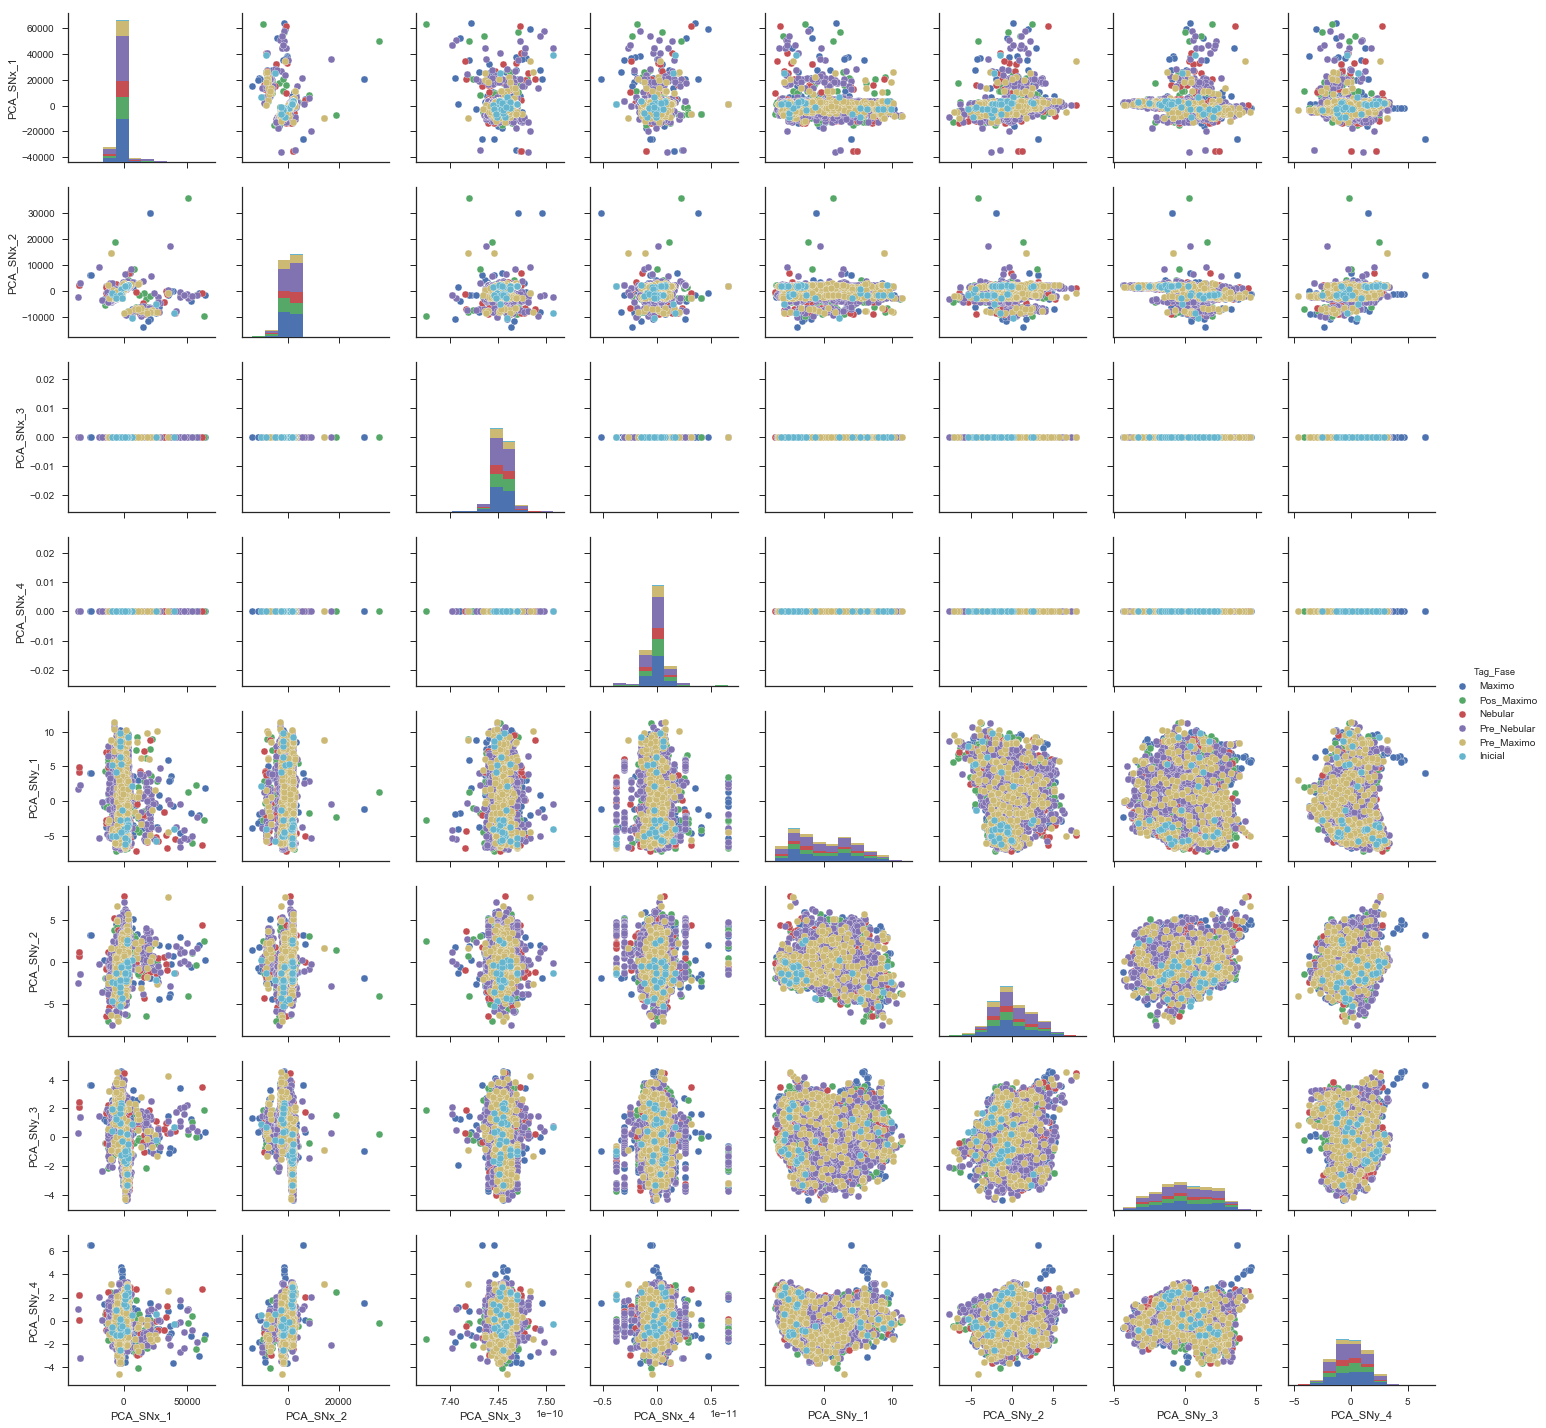

In [36]:
sns.set(style="ticks")
sns.pairplot(novo_Selecao_XY, hue="Tag_Fase")